# US Election 2012 Polls Dataset

1. Who was being polled and what was their party affiliation?
2. Did the poll results favor Romney or Obama?
3. How do undecided voters effect the poll?
4. How did voter sentiment change over time?
5. Can we see an effect in the polls from the debates?


In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.style.use("ggplot")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

from __future__ import division

In [2]:
import requests

In [3]:
from io import StringIO

In [4]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

In [5]:
source = requests.get(url).text

In [6]:
# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source) 

In [7]:
poll_df = pd.read_csv(poll_data)

In [8]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [9]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [10]:
poll_df.shape

(586, 17)

In [11]:
# Checking Null Values
poll_df.isnull().sum()

Pollster                    0
Start Date                  0
End Date                    0
Entry Date/Time (ET)        0
Number of Observations     22
Population                  0
Mode                        0
Obama                       0
Romney                      0
Undecided                 163
Other                     384
Pollster URL                0
Source URL                  2
Partisan                    0
Affiliation                 0
Question Text             586
Question Iteration          0
dtype: int64

In [12]:
poll_df.Obama.unique()

array([47., 49., 48., 50., 51., 46., 45., 44., 52., 43., 42., 53., 54.,
       39., 37., 41., 40., 38.])

In [13]:
poll_df.Romney.unique()

array([47., 48., 49., 46., 45., 43., 51., 50., 44., 41., 42., 39., 40.,
       38., 37., 53., 36., 33., 32., 35.])

In [14]:
poll_df.Population.unique()

array(['Likely Voters', 'Registered Voters', 'Adults',
       'Likely Voters - Republican'], dtype=object)

In [15]:
poll_df.Undecided.unique()

array([ 6.,  3.,  4., nan,  1.,  2.,  7., 11.,  5.,  8., 10.,  9., 15.,
       13., 12., 16., 17., 14., 27., 28., 24., 26.])

In [16]:
poll_df.Other.unique()

array([nan,  1.,  2.,  3.,  6.,  4.,  5.,  0.,  8.,  7., 19., 10., 11.,
        9., 12., 15.])

In [17]:
poll_df.Partisan.unique()

array(['Nonpartisan', 'Sponsor', 'Pollster'], dtype=object)

In [18]:
poll_df.Affiliation.unique()

array(['None', 'Rep', 'Dem', 'Other'], dtype=object)

Let's delete the Question Text Column.

In [19]:
del poll_df['Question Text']

#### Exploratory Data Analysis

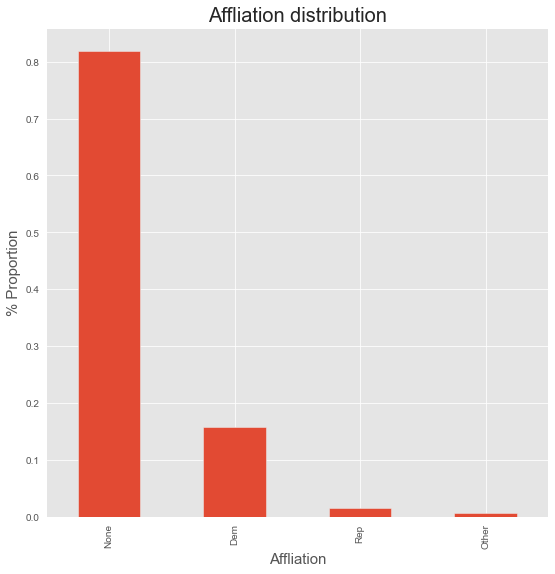

In [20]:
plt.figure(figsize=(9,9))
poll_df['Affiliation'].value_counts(normalize=True).plot(kind = 'bar')
plt.title('Affliation distribution', fontsize=20)
plt.xlabel('Affliation',fontsize=15)
plt.ylabel('% Proportion',fontsize=15)
plt.show()

### Looks like people are overall relatively neutral, but still leaning towards Democratic affiliation. 

<AxesSubplot:xlabel='Affiliation', ylabel='count'>

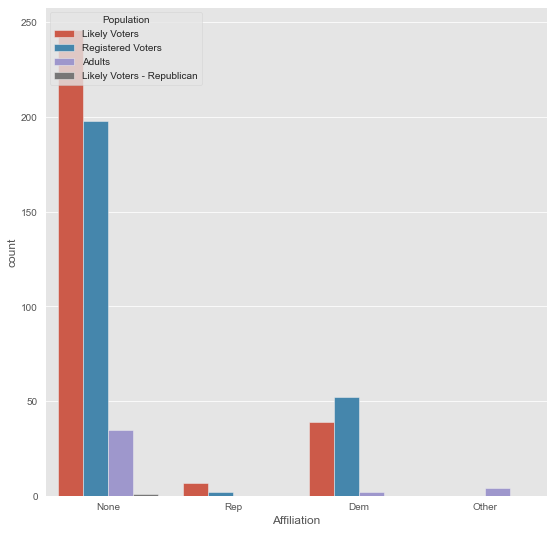

In [21]:
plt.figure(figsize=(9,9))
sns.countplot(x = "Affiliation", hue = "Population", data = poll_df)

In [22]:
#Looks like we have a strong showing of likely voters and Registered Voters, 
# so the poll data should hopefully be a good reflection on the populations polled.

Let's go ahead and take a look at the averages for Obama, Romney , and the polled people who remained undecided.

In [23]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,1


In [24]:
stats_var=["Obama","Romney","Undecided"]

In [25]:
poll_df[stats_var].describe()

,Obama,Romney,Undecided
count,586.000000,586.000000,423.000000
mean,46.805461,44.614334,6.550827
std,2.422058,2.906180,3.701754
min,37.000000,32.000000,1.000000
25%,45.000000,43.000000,4.000000
50%,47.000000,45.000000,6.000000
75%,48.000000,46.750000,8.000000
max,54.000000,53.000000,28.000000


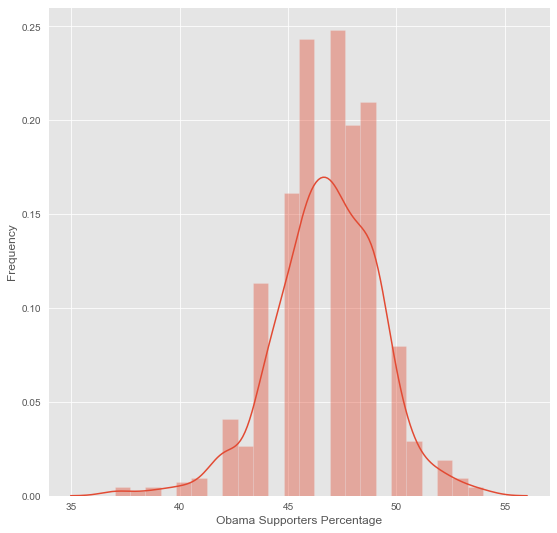

In [26]:
plt.figure(figsize=(9,9))
sns.distplot(poll_df["Obama"])
plt.xlabel("Obama Supporters Percentage")
plt.ylabel("Frequency")
plt.show()

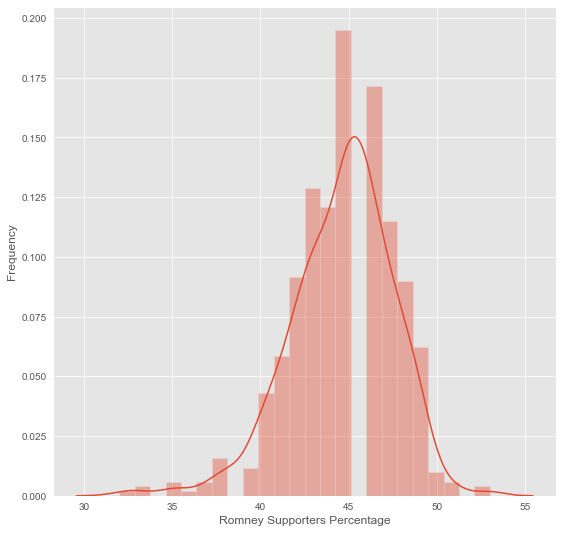

In [27]:
plt.figure(figsize=(9,9))
sns.distplot(poll_df["Romney"])
plt.xlabel("Romney Supporters Percentage")
plt.ylabel("Frequency")
plt.show()

Let's do a quick time series analysis of the voter sentiment by plotting Obama/Romney favor versus the Poll End Dates. 

<AxesSubplot:xlabel='End Date'>

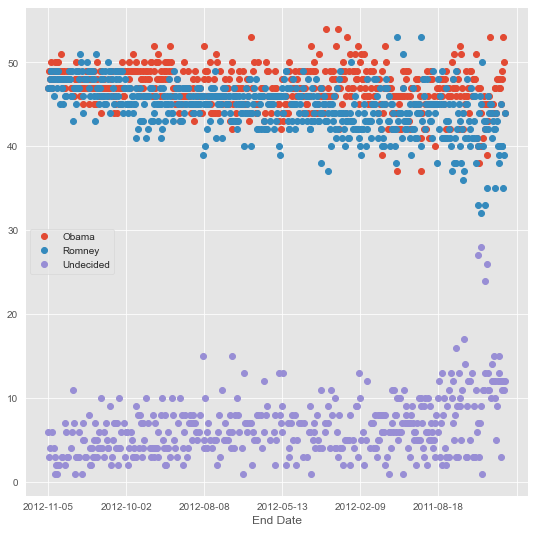

In [28]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',linestyle='', figsize=(9,9))

In [29]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,1,-0.01


The Difference column is Obama minus Romney, thus a positive difference indicates a leaning towards Obama in the polls.

In [30]:
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

In [31]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,1.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,1.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,1.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,1.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,1.0,0.09


In [32]:
poll_df.shape

(357, 8)

<AxesSubplot:xlabel='Start Date'>

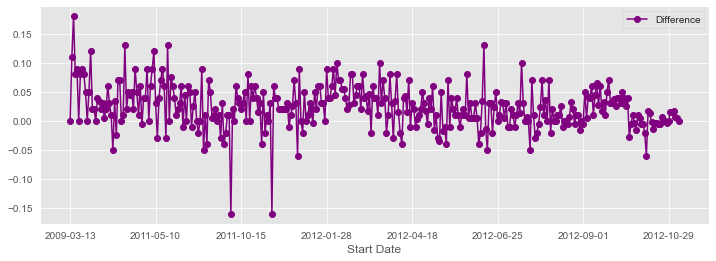

In [33]:
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

The debate dates were Oct 3rd, Oct 11, and Oct 22nd (2012). Let's plot some lines as markers and then zoom in on the month of October. In order to find where to set the x limits for the figure we need to find out where the index for the month of October in 2012 is. 


In [34]:
# Set row count and xlimit list
row_in = 0
xlimit = []

# Cycle through dates until 2012-10 is found, then print row index
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print (min(xlimit))
print (max(xlimit))

325
352


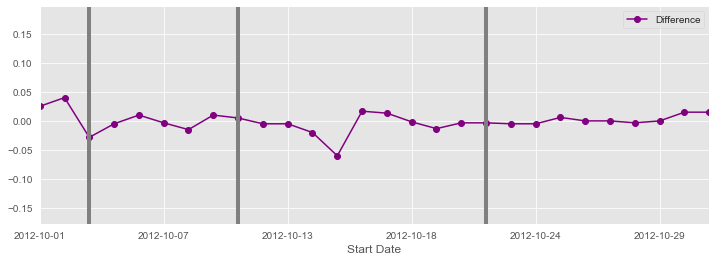

In [35]:
# Start with original figure
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(325,352))

# Now add the debate markers
plt.axvline(x=325+2, linewidth=4, color='grey')
plt.axvline(x=325+8, linewidth=4, color='grey')
plt.axvline(x=325+18, linewidth=4, color='grey')

### Thse polls reflect a dip for Obama after the second debate against Romney for a while, although the first  and third one gave him a boost.